In [1]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
from numba import njit, prange

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


## Poisson 1D: soluzione = $sin(\pi\,x)$

In [2]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)
    #return -dy_xx + tf.exp(x)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2
    #return np.exp(x)

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

Compiling model...
'compile' took 0.000866 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [4.17e+03, 2.37e+00]    [3.90e+03, 2.37e+00]    [1.45e+00]    
1000      [4.24e+00, 7.60e-01]    [3.30e+00, 7.60e-01]    [7.23e-01]    
2000      [2.13e+00, 1.73e-02]    [1.47e+00, 1.73e-02]    [1.12e-01]    
3000      [9.57e-01, 5.73e-03]    [7.01e-01, 5.73e-03]    [6.11e-02]    
4000      [4.25e-01, 4.78e-03]    [3.47e-01, 4.78e-03]    [5.65e-02]    
5000      [2.04e-01, 2.02e-03]    [1.78e-01, 2.02e-03]    [3.72e-02]    
6000      [7.58e-02, 6.62e-04]    [6.96e-02, 6.62e-04]    [2.15e-02]    
7000      [1.90e-02, 1.14e-04]    [1.91e-02, 1.14e-04]    [9.18e-03]    
8000      [7.13e-03, 5.22e-06]    [7.03e-03, 5.22e-06]    [2.36e-03]    
9000      [6.20e-03, 2.23e-08]    [5.56e-03, 2.23e-08]    [8.39e-04]    
10000     [5.84e-03, 1.40e-07]    [5.18e-03, 1.40e-07]    [7.87e-04]    

Best model at step 10000:
  train loss: 5.84e-03
  test lo

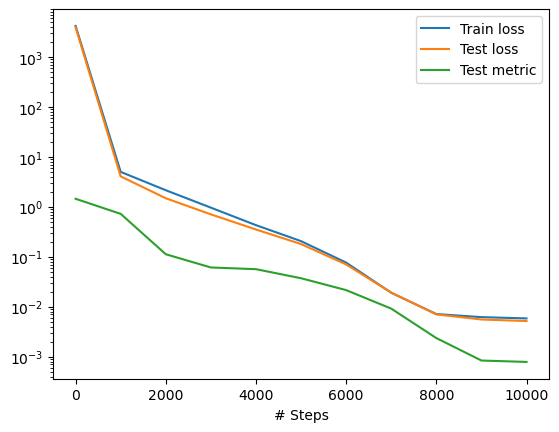

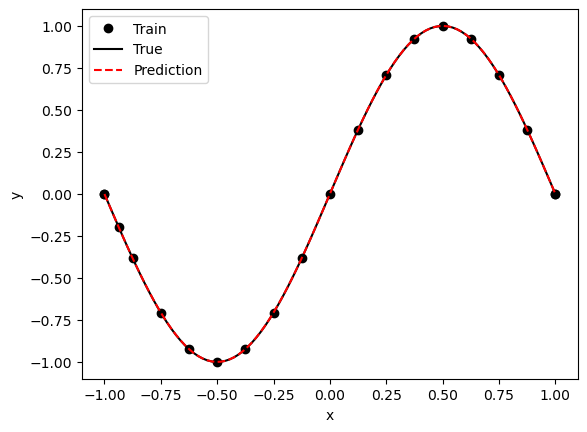

In [12]:
M =20
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"
R = 10
net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [4]:
pi = np.pi
history = {}
rr = [0.5, 1, 3, 4, 5, 6]

M = 200
layer_size = [1] + [M]  + [1]
activation = ["random_sin", 'linear']
initializer = "Glorot uniform"
loss = {}
epochs = {}
metric = {}
for i in rr:
    print(i)
    ll = []

    net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=i)

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])

    losshistory, train_state = model.train(iterations=50000)
    
    loss_test = losshistory.loss_test
    epochs[i] = losshistory.steps
    metric[i] = losshistory.metrics_test
    for j in range(np.shape(loss_test)[0]):
        ll.append(loss_test[j][0])
    loss[i] = ll

0.5
Compiling model...
'compile' took 0.002841 s

Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss              Test loss               Test metric   
0         [4.32e+01, 1.41e-01]    [4.88e+01, 1.41e-01]    [7.83e-01]    
1000      [3.00e+01, 4.85e-02]    [3.32e+01, 4.85e-02]    [6.83e-01]    
2000      [2.45e+01, 1.16e-02]    [2.51e+01, 1.16e-02]    [6.07e-01]    
3000      [2.30e+01, 1.28e-03]    [2.15e+01, 1.28e-03]    [5.60e-01]    
4000      [2.27e+01, 2.15e-05]    [2.03e+01, 2.15e-05]    [5.40e-01]    
5000      [2.27e+01, 3.02e-06]    [2.01e+01, 3.02e-06]    [5.36e-01]    
6000      [2.27e+01, 4.23e-06]    [2.01e+01, 4.23e-06]    [5.36e-01]    
7000      [2.27e+01, 3.94e-06]    [2.01e+01, 3.94e-06]    [5.36e-01]    
8000      [2.27e+01, 3.70e-06]    [2.00e+01, 3.70e-06]    [5.36e-01]    
9000      [2.27e+01, 3.51e-06]    [2.00e+01, 3.51e-06]    [5.35e-01]    
10000     [2.27e+01, 3.31e-06]    [2.00e+01, 3.31e-06]    [5.35e-01]    
11000     [2.27e+01, 2.96e-06]    [2.00e+01, 2.96e-06]    [5.35e-01]    
12000     [2.26e+01, 3.33e-06]    [2.00e+01, 3.33e-

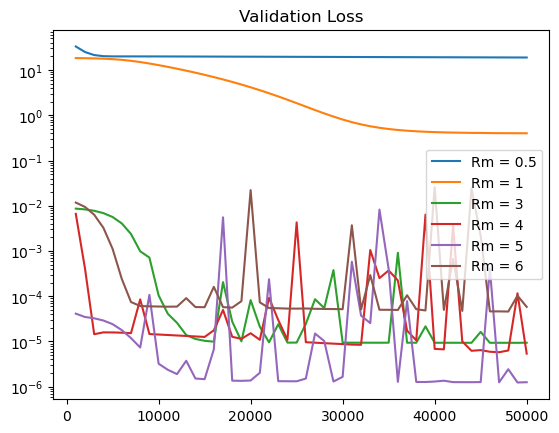

In [5]:
for i in loss:
    plt.plot(epochs[i][1:], loss[i][1:], label = 'Rm = ' + str(i))
plt.yscale('log')
plt.title('Validation Loss')
plt.legend()
plt.show()

## Poisson 1D: soluzione = $sin(3\pi\,x + \frac{3\pi}{20}) * cos(2\pi\,x + \frac{\pi}{10}) + 2$


In [9]:
pi = np.pi
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    #return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    #return np.sin(np.pi * x)
    return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-2, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary)
num_points = 100
num_validation = 400
data = dde.data.PDE(geom, pde, bc, num_points, 2, solution=func, num_test=num_validation)

Compiling model...
'compile' took 0.000666 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [3.98e+04, 9.02e+00]    [3.80e+04, 9.02e+00]    [1.15e+00]    
1000      [3.70e+03, 2.33e+00]    [3.80e+03, 2.33e+00]    [5.78e-01]    
2000      [3.68e+03, 6.75e-01]    [3.79e+03, 6.75e-01]    [2.93e-01]    
3000      [3.65e+03, 1.10e-01]    [3.78e+03, 1.10e-01]    [2.25e-01]    
4000      [3.63e+03, 6.21e-03]    [3.76e+03, 6.21e-03]    [2.76e-01]    
5000      [3.62e+03, 1.53e-04]    [3.74e+03, 1.53e-04]    [2.97e-01]    
6000      [3.59e+03, 1.59e-04]    [3.73e+03, 1.59e-04]    [2.99e-01]    
7000      [3.62e+03, 4.33e-05]    [3.73e+03, 4.33e-05]    [2.95e-01]    
8000      [3.55e+03, 3.62e-05]    [3.68e+03, 3.62e-05]    [2.96e-01]    
9000      [3.57e+03, 2.43e-04]    [3.69e+03, 2.43e-04]    [2.94e-01]    
10000     [3.52e+03, 2.56e-06]    [3.64e+03, 2.56e-06]    [2.94e-01]    

Best model at step 10000:
  train loss: 3.52e+03
  test lo

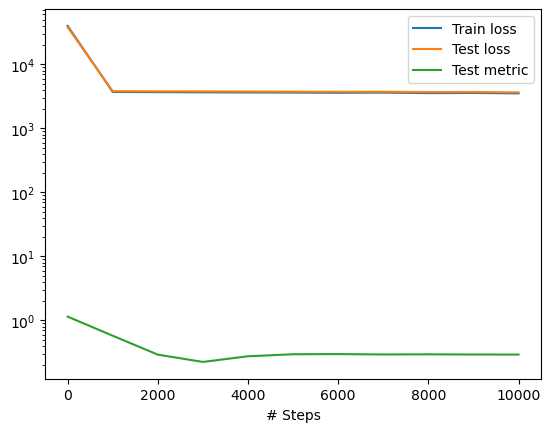

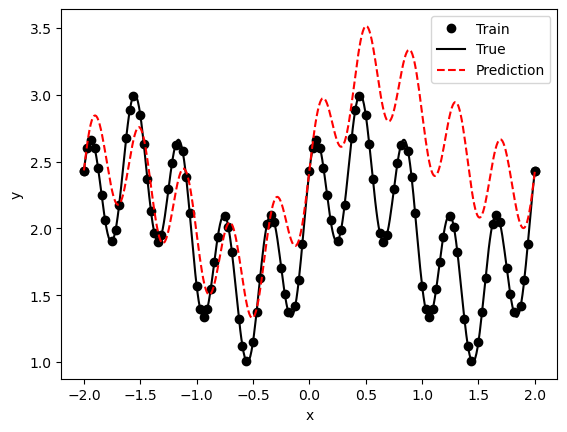

In [11]:
M =3200
layer_size = [1] + [M] + [1]
activation = ["random_sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=20)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)


## Partition of Unit

Compiling model...
'compile' took 0.000628 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [2.88e+04, 4.30e+00]    [2.98e+04, 4.30e+00]    [9.38e-01]    
1000      [2.55e+00, 1.16e+00]    [2.45e+00, 1.16e+00]    [8.65e-01]    
2000      [1.30e+00, 5.62e-01]    [1.45e+00, 5.62e-01]    [8.12e-01]    
3000      [1.03e+00, 3.82e-01]    [1.39e+00, 3.82e-01]    [7.59e-01]    
4000      [9.05e-01, 2.97e-01]    [1.46e+00, 2.97e-01]    [7.04e-01]    
5000      [8.33e-01, 2.41e-01]    [1.56e+00, 2.41e-01]    [6.44e-01]    
6000      [8.10e-01, 1.98e-01]    [1.89e+00, 1.98e-01]    [5.72e-01]    
7000      [7.37e-01, 1.64e-01]    [2.34e+00, 1.64e-01]    [4.98e-01]    
8000      [6.41e-01, 1.37e-01]    [2.76e+00, 1.37e-01]    [4.30e-01]    
9000      [7.39e-01, 1.16e-01]    [3.47e+00, 1.16e-01]    [3.70e-01]    
10000     [5.69e-01, 1.01e-01]    [3.69e+00, 1.01e-01]    [3.24e-01]    

Best model at step 10000:
  train loss: 6.71e-01
  test loss: 3.79e+00
  test metric: [3.24e-01]

'train

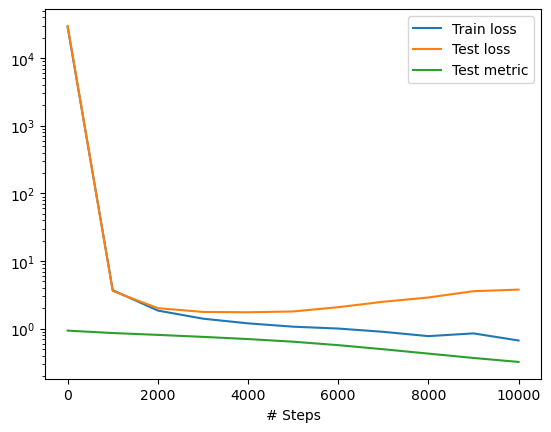

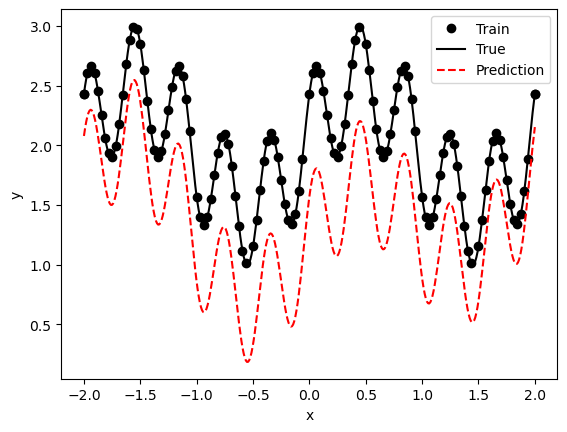

In [13]:
npart = 4
pi = np.pi
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    #return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    #return np.sin(np.pi * x)
    return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-2, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary)
ind = dde.nn.pou_indicators(geom, npart)

#num_points = (10+npart*10)*3
num_points = 120
num_validation = 400
data = dde.data.PDE(geom, pde, bc, num_points, 2, solution=func, num_test=num_validation)

M = np.ceil(1200/npart)
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"

R = 20
net = dde.nn.partition_random_FNN(layer_size, activation, initializer, npart, ind, Rm=R, b=R/10)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])#, loss_weights=wei)

losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

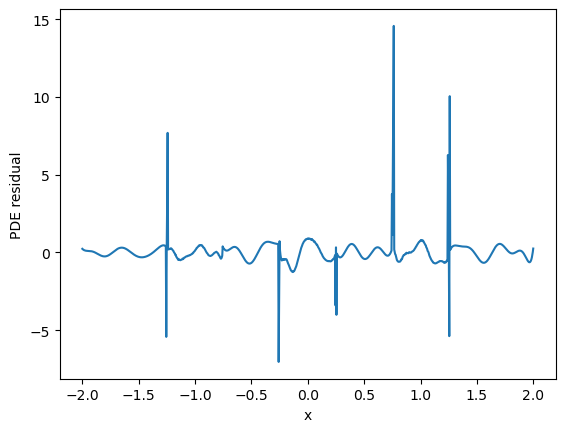

In [18]:
x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

In [8]:
loss_train = {}
loss_val = {}
loss = {}
train = {}
for npart in range(2,6):
    pi = np.pi
    def pde(x, y):
        dy_xx = dde.grad.hessian(y, x)
        # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
        #return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
        return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

    def boundary(x, on_boundary, npart=1):
        return on_boundary

    def func(x):
        #return np.sin(np.pi * x)
        return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

    geom = dde.geometry.Interval(-2, 2)
    bc = dde.icbc.DirichletBC(geom, func, boundary)
    ind = dde.nn.pou_indicators(geom, npart)

    num_points = 100
    num_validation = 400
    data = dde.data.PDE(geom, pde, bc, num_points, 2, solution=func, num_test=num_validation)

    M = np.ceil(1200/npart)
    
    layer_size = [1] + [M]  +  [1]

    activation = ["random_sin", 'linear']

    initializer = "Glorot uniform"

    R = 20
    net = dde.nn.partition_random_FNN(layer_size, activation, initializer, npart, ind, Rm=R, b=R/10)

    model = dde.Model(data, net)

    model.compile("adam", lr=0.001, metrics=["l2 relative error"])#, loss_weights=wei)

    losshistory, train_state = model.train(iterations=10000)

    loss_train[npart] = losshistory.loss_train[-1]
    loss_val[npart] = losshistory.loss_test[-1]
    loss[npart] = losshistory
    train[npart] = train_state

Compiling model...
'compile' took 0.000365 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [3.05e+04, 6.18e+00]    [2.94e+04, 6.18e+00]    [1.05e+00]    
1000      [7.44e-01, 5.28e-02]    [8.40e-01, 5.28e-02]    [5.05e-01]    
2000      [1.16e-01, 5.48e-03]    [3.29e-01, 5.48e-03]    [1.05e-01]    
3000      [9.81e-02, 7.22e-05]    [4.24e-01, 7.22e-05]    [4.07e-02]    
4000      [5.55e-02, 6.09e-06]    [3.88e-01, 6.09e-06]    [5.00e-02]    
5000      [3.91e-02, 7.04e-06]    [3.49e-01, 7.04e-06]    [4.51e-02]    
6000      [2.90e-02, 5.73e-06]    [3.14e-01, 5.73e-06]    [4.04e-02]    
7000      [2.88e-01, 5.98e-06]    [5.84e-01, 5.98e-06]    [3.69e-02]    
8000      [1.20e+00, 1.14e-06]    [1.25e+00, 1.14e-06]    [3.41e-02]    
9000      [1.25e-02, 9.28e-07]    [2.42e-01, 9.28e-07]    [3.20e-02]    
10000     [7.53e-01, 1.79e-06]    [9.43e-01, 1.79e-06]    [3.04e-02]    

Best model at step 9000:
  train loss: 1.25e-02
  test loss: 2.42e-01
  test metric: [3.20e-02]

'train'

In [9]:
print(loss_train)
print(loss_val)

{2: array([7.5281405e-01, 1.7894217e-06], dtype=float32), 3: array([0.44528255, 0.02887545], dtype=float32), 4: array([5.9355557e-02, 5.1129750e-06], dtype=float32), 5: array([0.23211192, 0.01017099], dtype=float32)}
{2: array([9.4283682e-01, 1.7897737e-06], dtype=float32), 3: array([2.204209  , 0.02887546], dtype=float32), 4: array([1.3301846e+00, 5.1129750e-06], dtype=float32), 5: array([1.2464737 , 0.01017099], dtype=float32)}


Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


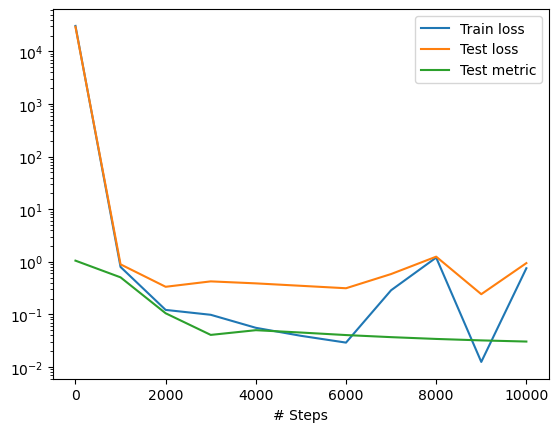

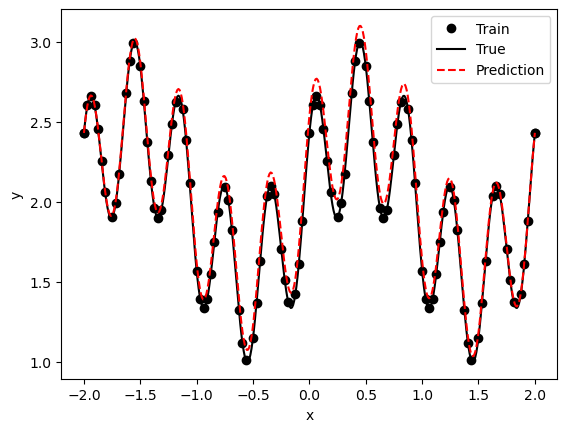

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


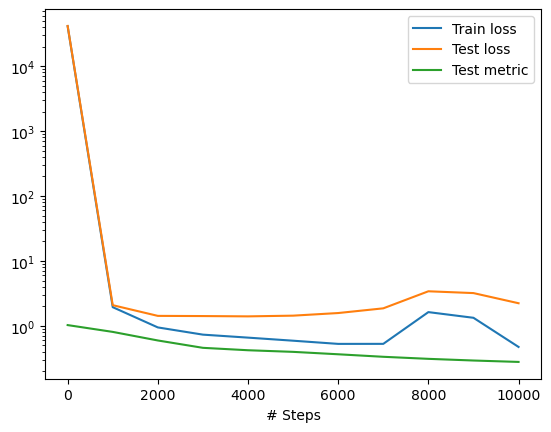

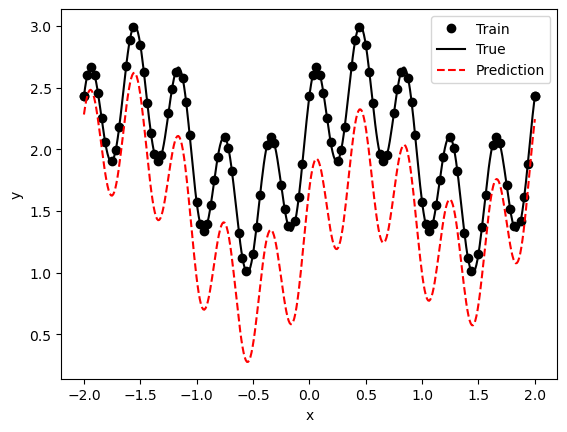

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


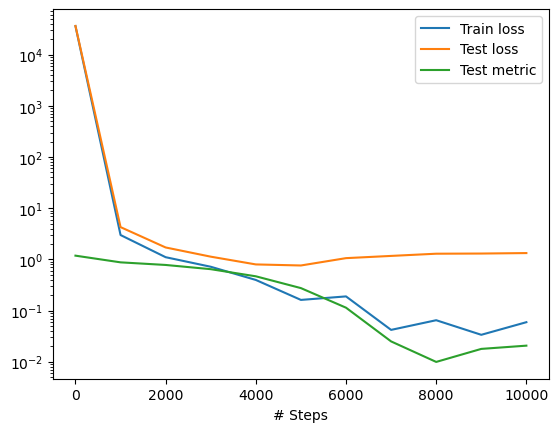

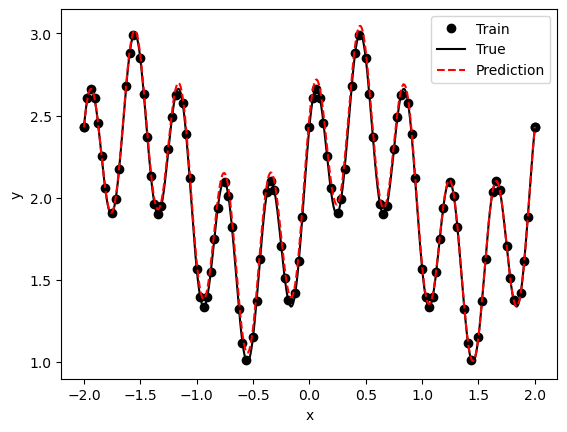

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


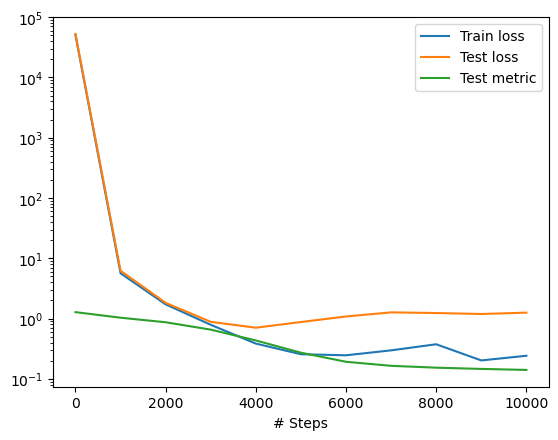

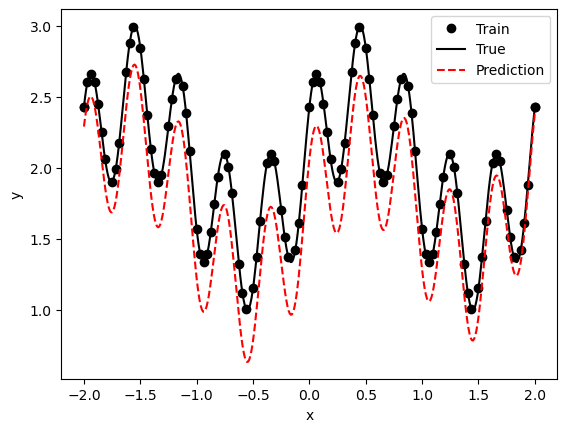

In [10]:
for i in range(2,6):
    dde.saveplot(loss[i], train[i])

#